In [1]:
# import required libraries

import os

import numpy as np
import pandas as pd

import tifffile
import glob

import matplotlib.pyplot as plt

from patchify import patchify

In [2]:
tif8 = pd.read_csv('/home/is/mahfujul-r/Make/filename_tif8_block2.txt', header=0, sep='\t')

sid8 = {'he1': 1, 'he2': 3, 'he3': 5, 'he4': 7, 'cd': 0, 'ck': 4, 'ki': 2, 'mt': 6}

tifflist_cd = glob.glob('/project/dsc-is/data/KPCL159/Block2/CD31/*.tif')
tifflist_ck = glob.glob('/project/dsc-is/data/KPCL159/Block2/CK19/*.tif')
tifflist_he = glob.glob('/project/dsc-is/data/KPCL159/Block2/HE/*.tif')
tifflist_ki = glob.glob('/project/dsc-is/data/KPCL159/Block2/Ki67/*.tif')
tifflist_mt = glob.glob('/project/dsc-is/data/KPCL159/Block2/MT/*.tif')

dir_tiff = '/project/dsc-is/data/KPCL159/Block2'
    
tifflist5 = [tifflist_cd, tifflist_ck, tifflist_he, tifflist_ki, tifflist_mt]

In [3]:
tif8

CD31                   HE_1                     Ki67  \
0    KPCL159_2_0017_CD31.tif  KPCL159-2-0018-HE.tif  KPCL159-2-0019-Ki67.tif   
1    KPCL159_2_0025_CD31.tif  KPCL159-2-0026-HE.tif  KPCL159-2-0027-Ki67.tif   
2    KPCL159_2_0033_CD31.tif  KPCL159-2-0034-HE.tif  KPCL159-2-0035-Ki67.tif   
3    KPCL159_2_0041_CD31.tif  KPCL159-2-0042-HE.tif  KPCL159-2-0043-Ki67.tif   
4    KPCL159_2_0049_CD31.tif  KPCL159-2-0050-HE.tif  KPCL159-2-0051-Ki67.tif   
..                       ...                    ...                      ...   
186  KPCL159_2_1521_CD31.tif  KPCL159-2-1522-HE.tif  KPCL159-2-1523-Ki67.tif   
187  KPCL159_2_1529_CD31.tif  KPCL159-2-1530-HE.tif  KPCL159-2-1531-Ki67.tif   
188  KPCL159_2_1537_CD31.tif  KPCL159-2-1538-HE.tif  KPCL159-2-1539-Ki67.tif   
189  KPCL159_2_1545_CD31.tif  KPCL159-2-1546-HE.tif  KPCL159-2-1547-Ki67.tif   
190  KPCL159_2_1553_CD31.tif  KPCL159-2-1554-HE.tif  KPCL159-2-1555-Ki67.tif   

                      HE_2                     CK19                   HE_3  \
0    KPCL159-2-0020-HE.tif  KPCL159_2_0021_CK19.tif  KPCL159-2-0022-HE.tif   
1    KPCL159-2-0028-HE.tif  KPCL159_2_0029_CK19.tif  KPCL159-2-0030-HE.tif   
2    KPCL159-2-0036-HE.tif  KPCL159_2_0037_CK19.tif  KPCL159-2-0038-HE.tif   
3    KPCL159-2-0044-HE.tif  KPCL159_2_0045_CK19.tif  KPCL159-2-0046-HE.tif   
4    KPCL159-2-0052-HE.tif  KPCL159_2_0053_CK19.tif  KPCL159-2-0054-HE.tif   
..                     ...                      ...                    ...   
186  KPCL159-2-1524-HE.tif  KPCL159_2_1525_CK19.tif  KPCL159-2-1526-HE.tif   
187  KPCL159-2-1532-HE.tif  KPCL159_2_1533_CK19.tif  KPCL159-2-1534-HE.tif   
188  KPCL159-2-1540-HE.tif  KPCL159_2_1541_CK19.tif  KPCL159-2-1542-HE.tif   
189  KPCL159-2-1548-HE.tif  KPCL159_2_1549_CK19.tif  KPCL159-2-1550-HE.tif   
190  KPCL159-2-1556-HE.tif  KPCL159_2_1557_CK19.tif  KPCL159-2-1558-HE.tif   

                        MT                   HE_4  
0    KPCL159-2-0023-MT.tif  KPCL159-2-0024-HE.tif  
1    KPCL159-2-0031-MT.tif  KPCL159-2-0032-HE.tif  
2    KPCL159-2-0039-MT.tif  KPCL159-2-0040-HE.tif  
3    KPCL159-2-0047-MT.tif  KPCL159-2-0048-HE.tif  
4    KPCL159-2-0055-MT.tif  KPCL159-2-0056-HE.tif  
..                     ...                    ...  
186  KPCL159-2-1527-MT.tif  KPCL159-2-1528-HE.tif  
187  KPCL159-2-1535-MT.tif  KPCL159-2-1536-HE.tif  
188  KPCL159-2-1543-MT.tif  KPCL159-2-1544-HE.tif  
189  KPCL159-2-1551-MT.tif  KPCL159-2-1552-HE.tif  
190  KPCL159-2-1559-MT.tif  KPCL159-2-1560-HE.tif  

[191 rows x 8 columns]

`191 WSIs`

8 stains but chose `HE_1`, `MT`, `CD31`, `CK19` and `Ki67`

In [4]:
np.random.seed(765)
tif8_select = tif8.sample(n=1) # randomly select 1 WSI
tif8_select

CD31                   HE_1                     Ki67  \
127  KPCL159_2_1033_CD31.tif  KPCL159-2-1034-HE.tif  KPCL159-2-1035-Ki67.tif   

                      HE_2                     CK19                   HE_3  \
127  KPCL159-2-1036-HE.tif  KPCL159_2_1037_CK19.tif  KPCL159-2-1038-HE.tif   

                        MT                   HE_4  
127  KPCL159-2-1039-MT.tif  KPCL159-2-1040-HE.tif

In [5]:
file_tiff0 = tif8_select['HE_1']
file_tiff0

127    KPCL159-2-1034-HE.tif
Name: HE_1, dtype: object

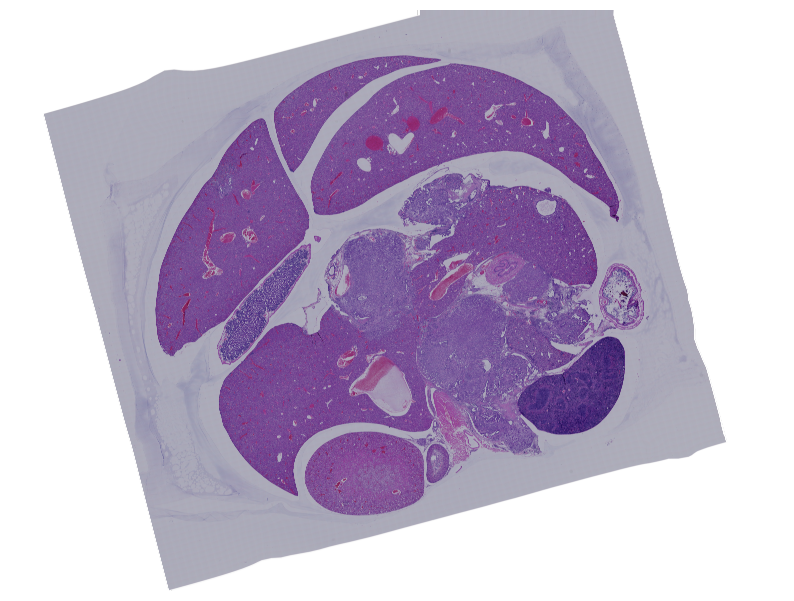

In [6]:
# display randomly selected `HE stained WSI`

plt.figure(figsize=(10, 10))
plt.imshow(tifffile.imread('/project/dsc-is/data/KPCL159/Block2/HE/KPCL159-2-1034-HE.tif'))
plt.axis('off');

In [7]:
# sequentially create patches from randomly selected 'HE stained WSI'

collect0 = []
path_tiff = os.path.join(dir_tiff, 'HE', file_tiff0.values[0])
img_ff = tifffile.imread(path_tiff)
patches_ = patchify(img_ff, (128, 128, 3), step=128)
for i in range(patches_.shape[0]):
    for j in range(patches_.shape[1]):
        single_patch_img = patches_[i, j, 0, :, :, :]
        collect0.append(single_patch_img)

In [8]:
len(collect0) # total patches

18252

In [9]:
matrix0 = np.array(collect0)
matrix0.shape # (total patches, height, width, channels)

(18252, 128, 128, 3)

In [10]:
a = np.zeros((18252, 5, 128, 128, 3), dtype=np.uint8)
a.shape

(18252, 5, 128, 128, 3)

In [11]:
a[:, 0, :, :, :] = matrix0

In [12]:
file_tiff1 = tif8_select['MT']
file_tiff1

127    KPCL159-2-1039-MT.tif
Name: MT, dtype: object

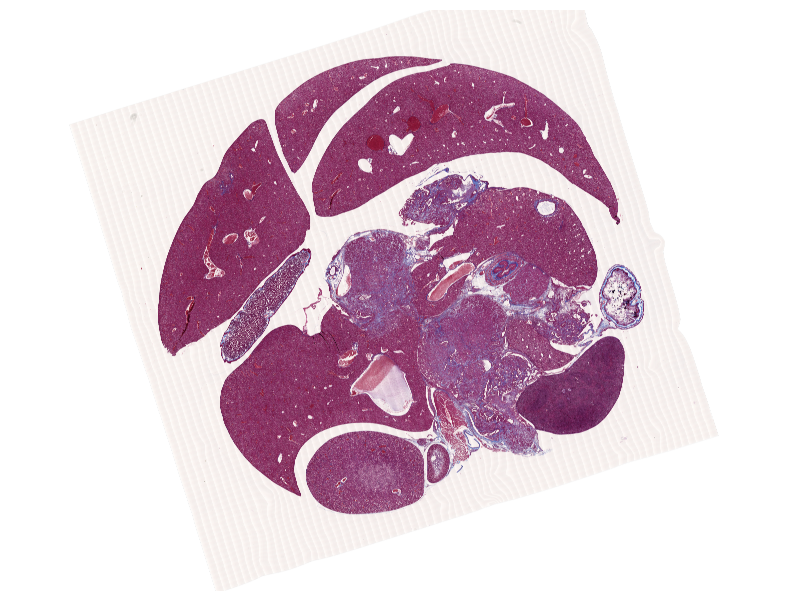

In [13]:
# display randomly selected 'MT stained WSI'

plt.figure(figsize=(10, 10))
plt.imshow(tifffile.imread('/project/dsc-is/data/KPCL159/Block2/MT/KPCL159-2-1039-MT.tif'))
plt.axis('off');

In [14]:
# sequentially create patches from randomly selected 'MT stained WSI'

collect1 = []
path_tiff = os.path.join(dir_tiff, 'MT', file_tiff1.values[0])
img_ff = tifffile.imread(path_tiff)
patches_ = patchify(img_ff, (128, 128, 3), step=128)
for i in range(patches_.shape[0]):
    for j in range(patches_.shape[1]):
        single_patch_img = patches_[i, j, 0, :, :, :]
        collect1.append(single_patch_img)

In [15]:
len(collect1) # total patches

18252

In [16]:
matrix1 = np.array(collect1)
matrix1.shape # (total patches, height, width, channels)

(18252, 128, 128, 3)

In [17]:
a[:, 1, :, :, :] = matrix1

In [18]:
file_tiff2 = tif8_select['CD31']
file_tiff2

127    KPCL159_2_1033_CD31.tif
Name: CD31, dtype: object

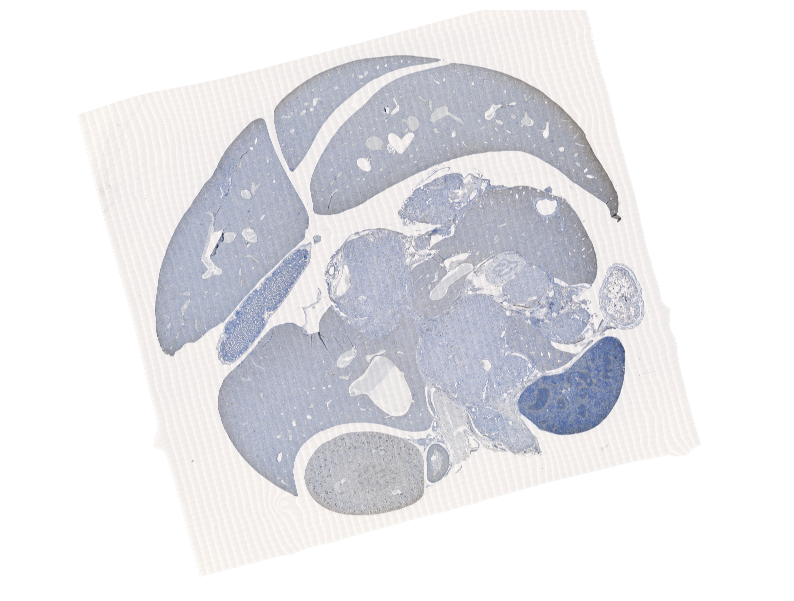

In [19]:
# display randomly selected 'CD31 stained WSI'

plt.figure(figsize=(10, 10))
plt.imshow(tifffile.imread('/project/dsc-is/data/KPCL159/Block2/CD31/KPCL159_2_1033_CD31.tif'))
plt.axis('off');

In [20]:
# sequentially create patches from randomly selected 'CD31 stained WSI'

collect2 = []
path_tiff = os.path.join(dir_tiff, 'CD31', file_tiff2.values[0])
img_ff = tifffile.imread(path_tiff)
patches_ = patchify(img_ff, (128, 128, 3), step=128)
for i in range(patches_.shape[0]):
    for j in range(patches_.shape[1]):
        single_patch_img = patches_[i, j, 0, :, :, :]
        collect2.append(single_patch_img)

In [21]:
len(collect2) # total patches

18252

In [22]:
matrix2 = np.array(collect2)
matrix2.shape # (total patches, height, width, channels)

(18252, 128, 128, 3)

In [23]:
a[:, 2, :, :, :] = matrix2

In [24]:
file_tiff3 = tif8_select['CK19']
file_tiff3

127    KPCL159_2_1037_CK19.tif
Name: CK19, dtype: object

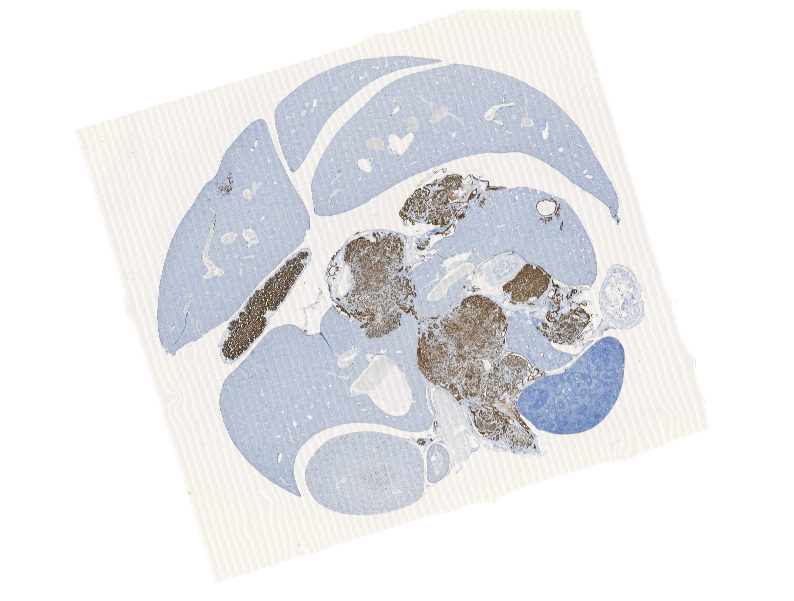

In [25]:
# display randomly selected 'CK19 stained WSI'

plt.figure(figsize=(10, 10))
plt.imshow(tifffile.imread('/project/dsc-is/data/KPCL159/Block2/CK19/KPCL159_2_1037_CK19.tif'))
plt.axis('off');

In [26]:
# sequentially create patches from randomly selected 'CK19 stained WSI'

collect3 = []
path_tiff = os.path.join(dir_tiff, 'CK19', file_tiff3.values[0])
img_ff = tifffile.imread(path_tiff)
patches_ = patchify(img_ff, (128, 128, 3), step=128)
for i in range(patches_.shape[0]):
    for j in range(patches_.shape[1]):
        single_patch_img = patches_[i, j, 0, :, :, :]
        collect3.append(single_patch_img)

In [27]:
len(collect3) # total patches

18252

In [28]:
matrix3 = np.array(collect3)
matrix3.shape # (total patches, height, width, channels)

(18252, 128, 128, 3)

In [29]:
a[:, 3, :, :, :] = matrix3

In [30]:
file_tiff4 = tif8_select['Ki67']
file_tiff4

127    KPCL159-2-1035-Ki67.tif
Name: Ki67, dtype: object

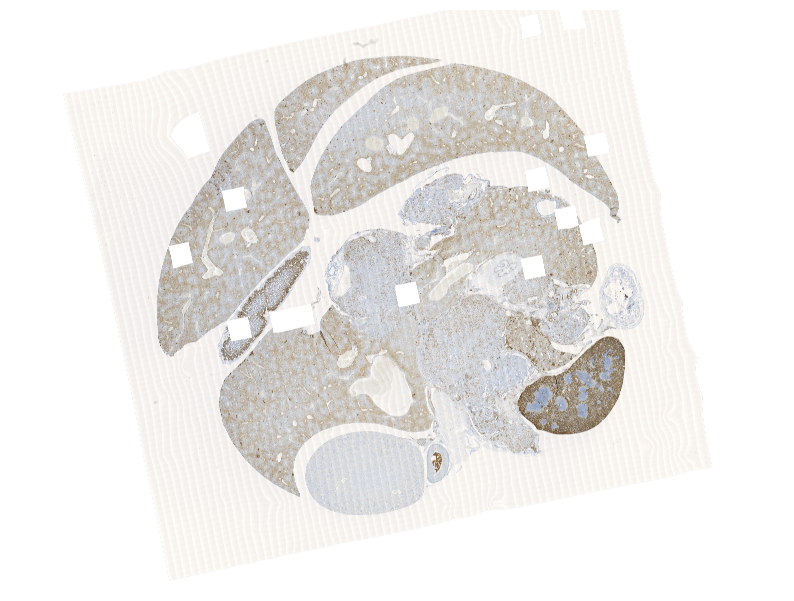

In [31]:
# display randomly selected 'Ki67 stained WSI'

plt.figure(figsize=(10, 10))
plt.imshow(tifffile.imread('/project/dsc-is/data/KPCL159/Block2/Ki67/KPCL159-2-1035-Ki67.tif'))
plt.axis('off');

In [32]:
# sequentially create patches from randomly selected 'Ki67 stained WSI'

collect4 = []
path_tiff = os.path.join(dir_tiff, 'Ki67', file_tiff4.values[0])
img_ff = tifffile.imread(path_tiff)
patches_ = patchify(img_ff, (128, 128, 3), step=128)
for i in range(patches_.shape[0]):
    for j in range(patches_.shape[1]):
        single_patch_img = patches_[i, j, 0, :, :, :]
        collect4.append(single_patch_img)

In [33]:
len(collect4) # total patches

18252

In [34]:
matrix4 = np.array(collect4)
matrix4.shape # (total patches, height, width, channels)

(18252, 128, 128, 3)

In [35]:
a[:, 4, :, :, :] = matrix4

In [36]:
np.save('./seq_patches_18252_from_1wsi.npy', a) # save dataset as '.npy' array

In [37]:
data_seq = np.load('./seq_patches_18252_from_1wsi.npy') # load dataset

In [38]:
data_seq.shape # check shape

(18252, 5, 128, 128, 3)

`(total patches, stains, height, width, channels)`

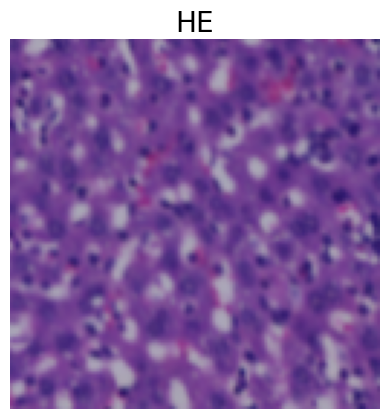

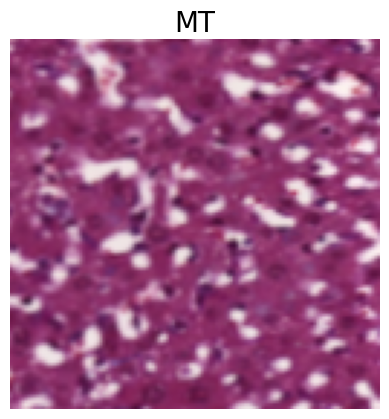

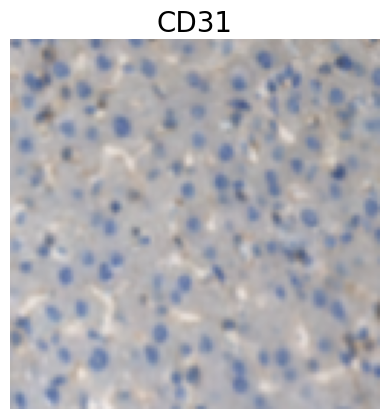

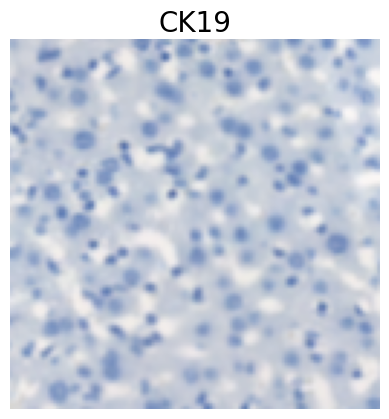

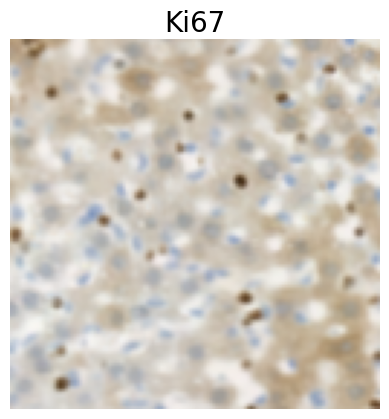

In [39]:
# display a patch with 5 stains

plt.imshow(data_seq[2600][0])
plt.title('HE', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(data_seq[2600][1])
plt.title('MT', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(data_seq[2600][2])
plt.title('CD31', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(data_seq[2600][3])
plt.title('CK19', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(data_seq[2600][4])
plt.title('Ki67', fontsize=20)
plt.axis('off')
plt.show();